### Outlier Detection using std and z-score

You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

(1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

(2) After removing outliers in step 1, you get a new dataframe.

(3) On step(2) dataframe, use 4 standard deviation to remove outliers

(4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

(5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

In [36]:
#import library
import pandas as pd

In [37]:
#load the dataset
df = pd.read_csv('bhp.csv')
df.head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615


In [38]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


#### 1)Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

In [39]:
min_threshold, max_threshold = df.price_per_sqft.quantile([0.001, 0.999])
min_threshold, max_threshold

(1366.184, 50959.36200000099)

In [40]:
df1 = df[(df.price_per_sqft>min_threshold) & (df.price_per_sqft<max_threshold)]
df1.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13172.000000,13172.000000,13172.000000,13172.000000,13172.000000
mean,1537.861049,2.690100,111.591865,2.799651,6663.653735
std,967.123711,1.337026,145.372047,1.291130,4141.020700
min,250.000000,1.000000,8.000000,1.000000,1379.000000
25%,1100.000000,2.000000,50.000000,2.000000,4271.000000
50%,1274.500000,2.000000,71.550000,3.000000,5438.000000
75%,1670.000000,3.000000,120.000000,3.000000,7311.000000
max,30400.000000,40.000000,3600.000000,43.000000,50349.000000


In [41]:
 df1.shape

(13172, 7)

use 4 standard deviation to remove outliers

In [42]:
m = df1.price_per_sqft.mean()
m

6663.6537351958705

In [43]:
std = df1.price_per_sqft.std()
std

4141.020700174605

In [44]:
lower_limit = m - (4*std)
upper_limit = m + (4*std)

In [45]:
df2 = df1[(df1.price_per_sqft>lower_limit) & (df1.price_per_sqft<upper_limit)]
df2.head(3)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305


In [46]:
df2.shape

(13047, 7)

In [49]:
df1[(df1.price_per_sqft<lower_limit) | (df1.price_per_sqft>upper_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719
760,other,9 Bedroom,600.0,9.0,190.0,9,31666
...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000


#### 4)Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

In [53]:
#import lib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

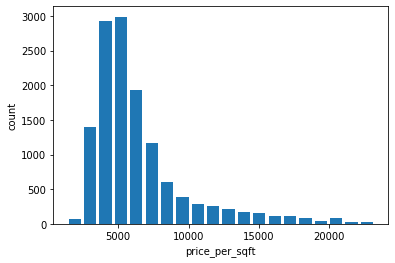

In [61]:
plt.hist(df2.price_per_sqft,rwidth=.8, bins=20)
plt.xlabel('price_per_sqft')
plt.ylabel('count')
plt.show()

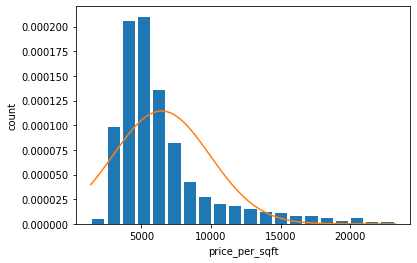

In [65]:
from scipy.stats import norm
import numpy as np
plt.hist(df2.price_per_sqft,rwidth=.8, bins=20,density=True)
plt.xlabel('price_per_sqft')
plt.ylabel('count')

rng = np.arange(df2.price_per_sqft.min(), df2.price_per_sqft.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df2.price_per_sqft.mean(),df2.price_per_sqft.std()))
plt.show()

In [66]:
df2.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13047.000000,13047.00000,13047.000000,13047.000000,13047.000000
mean,1529.296249,2.66613,105.850314,2.776270,6449.328045
std,948.777194,1.26673,118.818313,1.211623,3487.670005
min,250.000000,1.00000,8.000000,1.000000,1379.000000
25%,1100.000000,2.00000,50.000000,2.000000,4259.000000
50%,1270.000000,2.00000,70.000000,3.000000,5415.000000
75%,1660.000000,3.00000,117.500000,3.000000,7222.000000
max,30400.000000,27.00000,2340.000000,27.000000,23214.000000


#### 5) use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

In [68]:
df3 = df1.copy()
df3.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13172.000000,13172.000000,13172.000000,13172.000000,13172.000000
mean,1537.861049,2.690100,111.591865,2.799651,6663.653735
std,967.123711,1.337026,145.372047,1.291130,4141.020700
min,250.000000,1.000000,8.000000,1.000000,1379.000000
25%,1100.000000,2.000000,50.000000,2.000000,4271.000000
50%,1274.500000,2.000000,71.550000,3.000000,5438.000000
75%,1670.000000,3.000000,120.000000,3.000000,7311.000000
max,30400.000000,40.000000,3600.000000,43.000000,50349.000000


In [71]:
df3.head(3)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305


In [74]:
df3['zscore'] = (df3.price_per_sqft-m)/std
df3.head(3)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583


In [82]:
df4 = df3[(df3.zscore<4) & (df3.zscore>-4)]
df4.head(4)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099


In [83]:
df4.describe()

,total_sqft,bath,price,bhk,price_per_sqft,zscore
count,13047.000000,13047.00000,13047.000000,13047.000000,13047.000000,13047.000000
mean,1529.296249,2.66613,105.850314,2.776270,6449.328045,-0.051757
std,948.777194,1.26673,118.818313,1.211623,3487.670005,0.842225
min,250.000000,1.00000,8.000000,1.000000,1379.000000,-1.276172
25%,1100.000000,2.00000,50.000000,2.000000,4259.000000,-0.580691
50%,1270.000000,2.00000,70.000000,3.000000,5415.000000,-0.301533
75%,1660.000000,3.00000,117.500000,3.000000,7222.000000,0.134833
max,30400.000000,27.00000,2340.000000,27.000000,23214.000000,3.996683


In [85]:
pd.concat([df2.price_per_sqft.describe(),df4.price_per_sqft.describe()],1)

,price_per_sqft,price_per_sqft
count,13047.000000,13047.000000
mean,6449.328045,6449.328045
std,3487.670005,3487.670005
min,1379.000000,1379.000000
25%,4259.000000,4259.000000
50%,5415.000000,5415.000000
75%,7222.000000,7222.000000
max,23214.000000,23214.000000
